In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def reading_file(data):
    data_head= pd.read_csv(data)
    return data_head

In [3]:
train_salaries= reading_file('train_salaries.csv')
train_features= reading_file('train_features.csv')
test_features= reading_file('test_features.csv')

In [4]:
csv_files= [train_salaries,train_features,test_features]

for item in csv_files:
   
    print(item.head())  

              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
              jobId companyId  jobType       degree    major industry  \
0  JOB13626854

In [5]:
for item in csv_files:
   
    print(item.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType             

In [6]:
for item in csv_files:
    print(item.duplicated().sum())  

0
0
0


In [7]:
for item in csv_files:
    print(item.isnull().sum())  

jobId     0
salary    0
dtype: int64
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [8]:
for item in csv_files:
    print(item.describe())  

               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


In [9]:
train_data= pd.merge(train_features,train_salaries,how='inner',on= 'jobId')

In [10]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [11]:
train_data=train_data.drop(['jobId','companyId'],axis=1)
train_data.head()                                                     #dropping JobId and Company Id as they are not important features

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Exploratory Analysis

In [12]:
cat_cols= ['jobType','degree','major','industry']
num_cols= ['yearsExperience','milesFromMetropolis']
target= 'salary'

Text(0.5, 1.0, 'Salary Distribution')

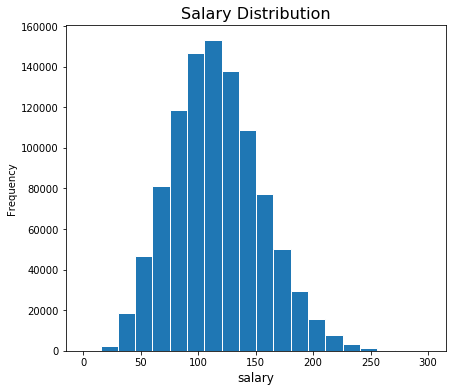

In [13]:
plt.subplot(1, 2, 1)
train_data['salary'].plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('salary', fontsize=12)
plt.title('Salary Distribution', fontsize=16) 

In [14]:
stats= train_data['salary'].describe()
IQR=stats['75%']-stats['25%']
upper_range= stats['75%']+1.5*IQR
lower_range=stats['25%']-1.5* IQR

In [15]:
print('The upper and lower bounds for salary are {} and {}'.format(upper_range,lower_range))

The upper and lower bounds for salary are 220.5 and 8.5


In [18]:
#train_data[train_data_new['salary']<8.5]

In [19]:
train_data = train_data[train_data['salary'] >= 8.5]

In [20]:
len(train_data[train_data['salary']<8.5])

0

In [21]:
train_data.loc[train_data['salary']>220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [22]:
train_data[(train_data['salary']>220.5) & (train_data['jobType']=='JUNIOR')]

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 7 columns):
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(4)
memory usage: 61.0+ MB


In [25]:
#rain_data_new['jobType'].dtype

In [26]:
def countplot(features,data):
   
    for i in range(len(features)):
        fig1, ax1 = plt.subplots(figsize=(12, 10), sharex=True)
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.countplot(x= data[features[i]],data=data)
        fig1.show()
        fig1.tight_layout()
        

def boxplot(features,target,data):
    for i in range(len(features)):
        fig2, ax2 = plt.subplots(figsize=(14, 16), sharex=True)
        sns.set(style="white", context="talk")
        sns.boxplot(x= data[features[i]],y= data[target], data=data)
        fig2.show()
        fig2.tight_layout()
        
        
        
def crosscorrelation(features, target, data):
    correlation_list=[]
    for i in range(len(features)):
        a= data[features[i]].corr(data[target])
        correlation_list.append({features[i]:a})
    return correlation_list
        

C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


None


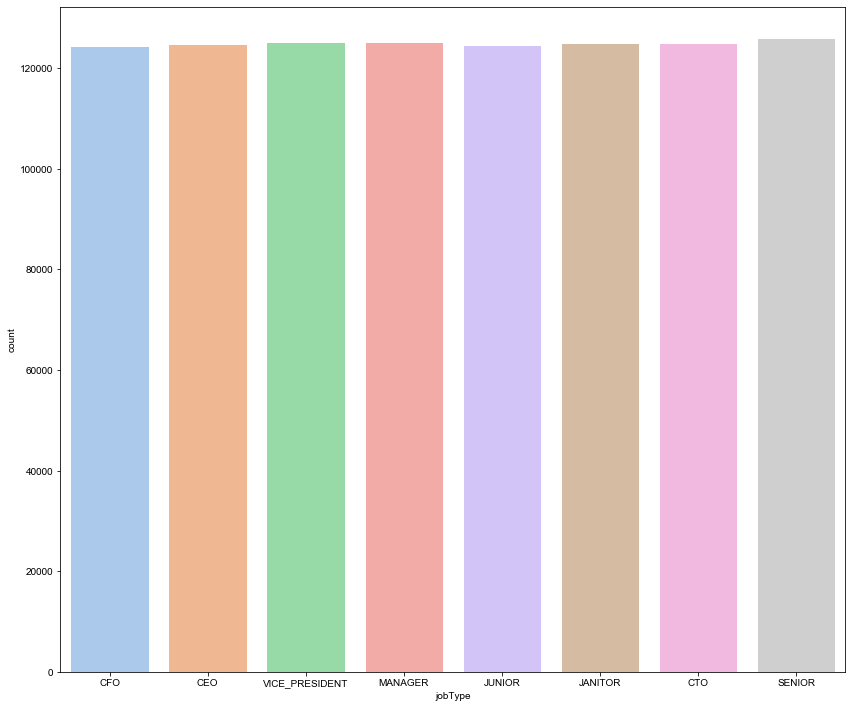

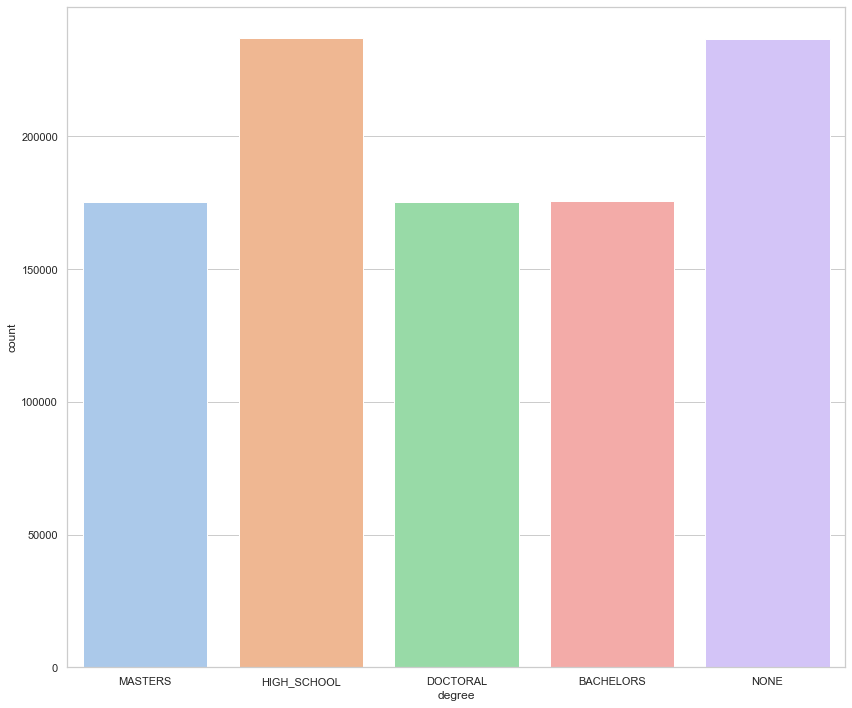

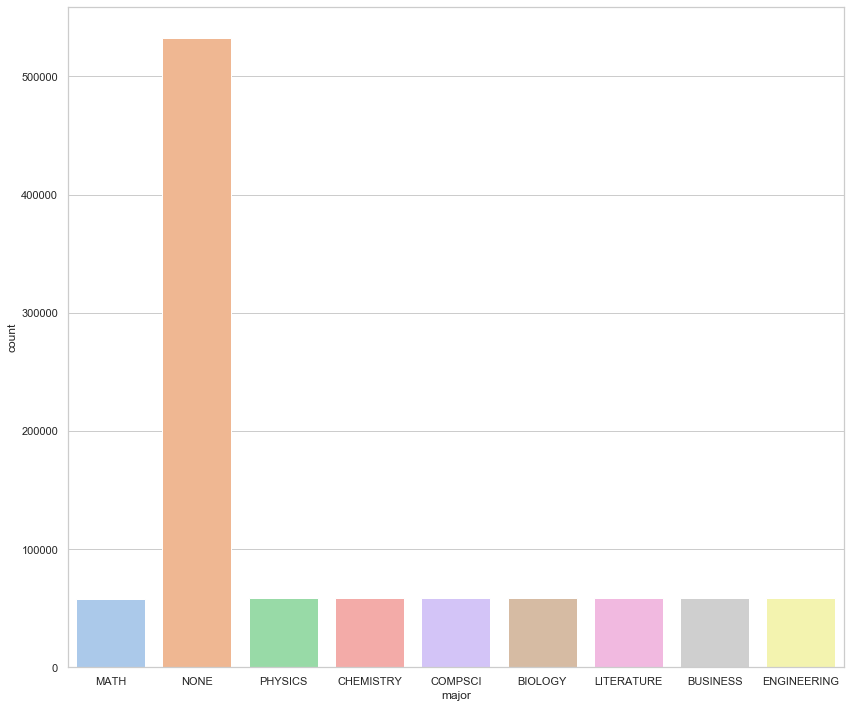

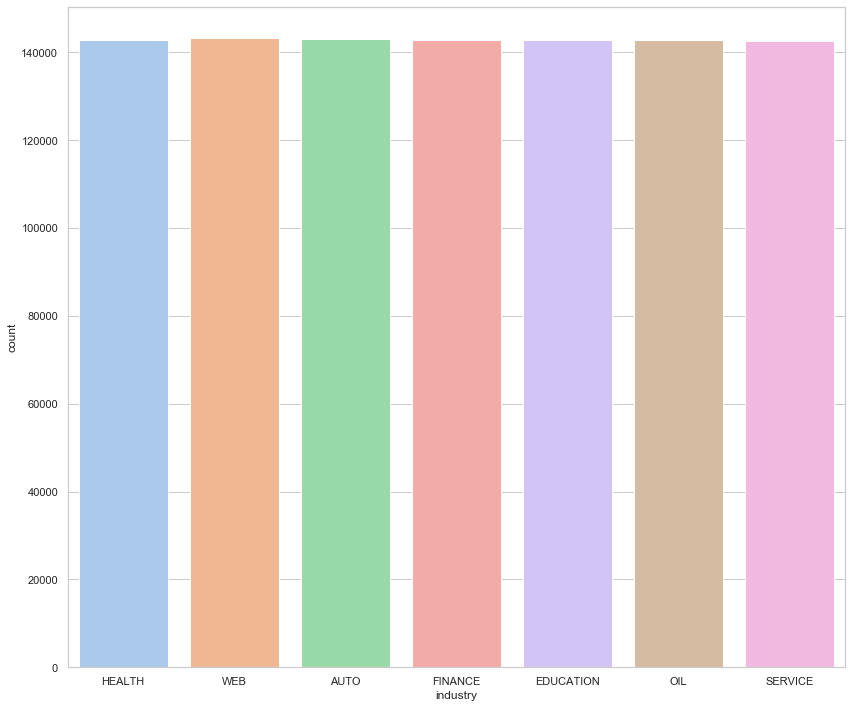

In [27]:
print(countplot(cat_cols,train_data))

C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend,

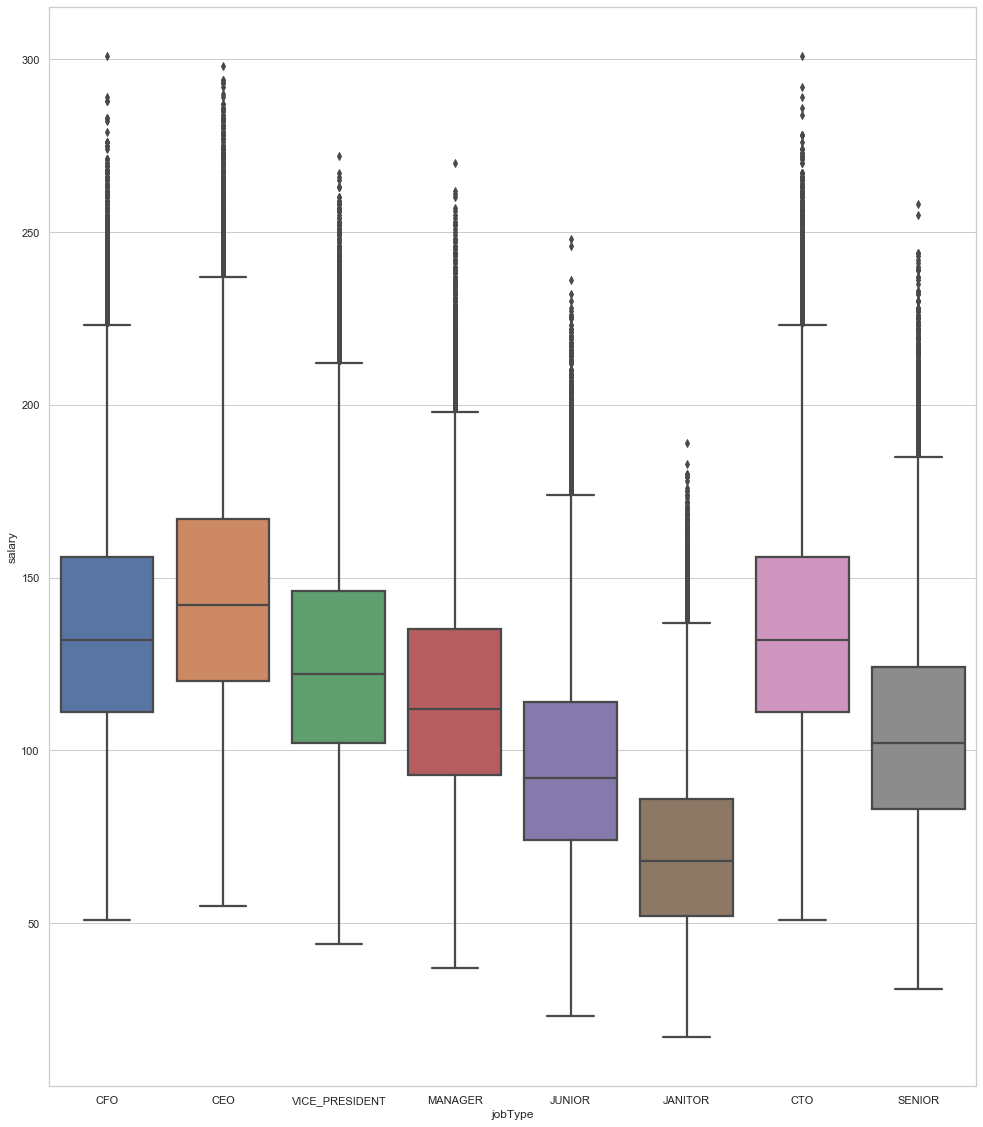

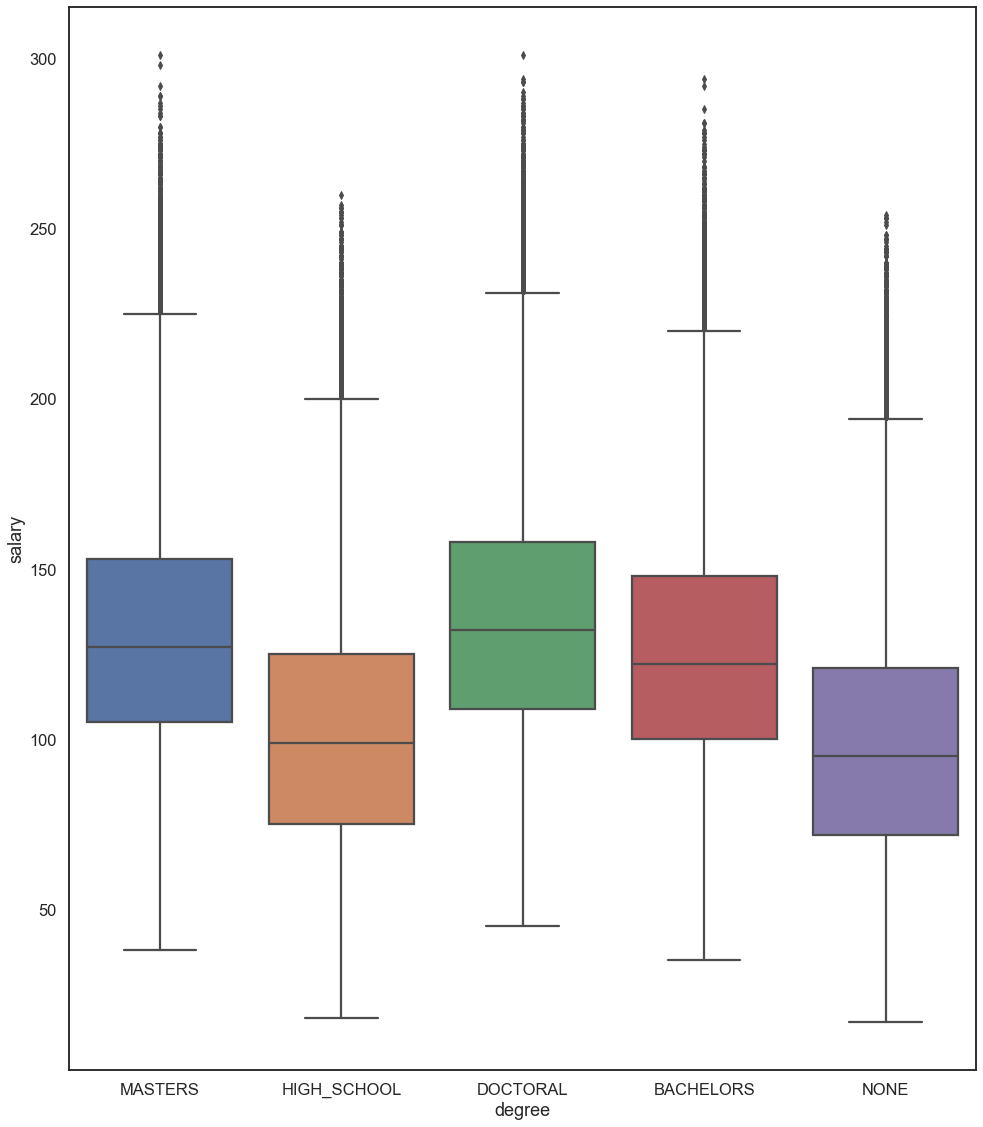

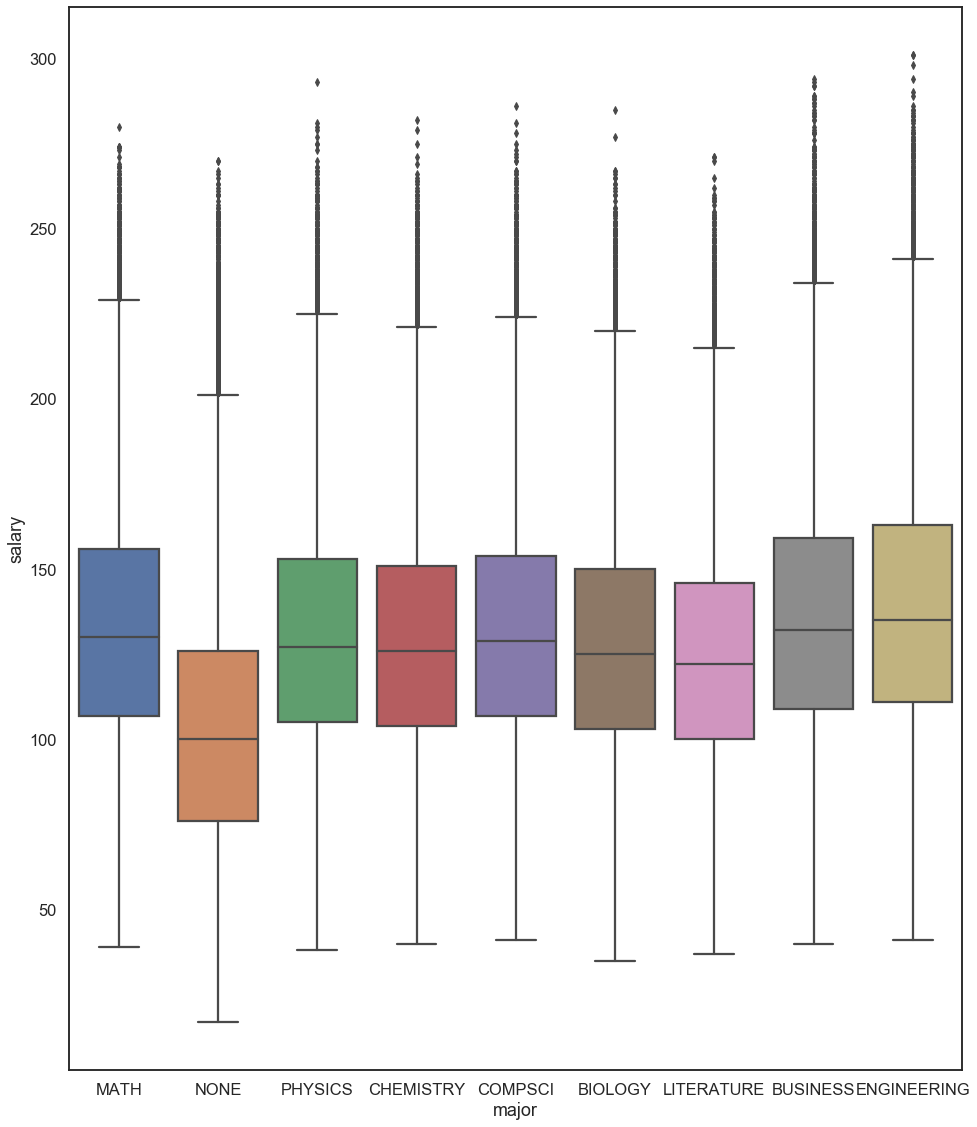

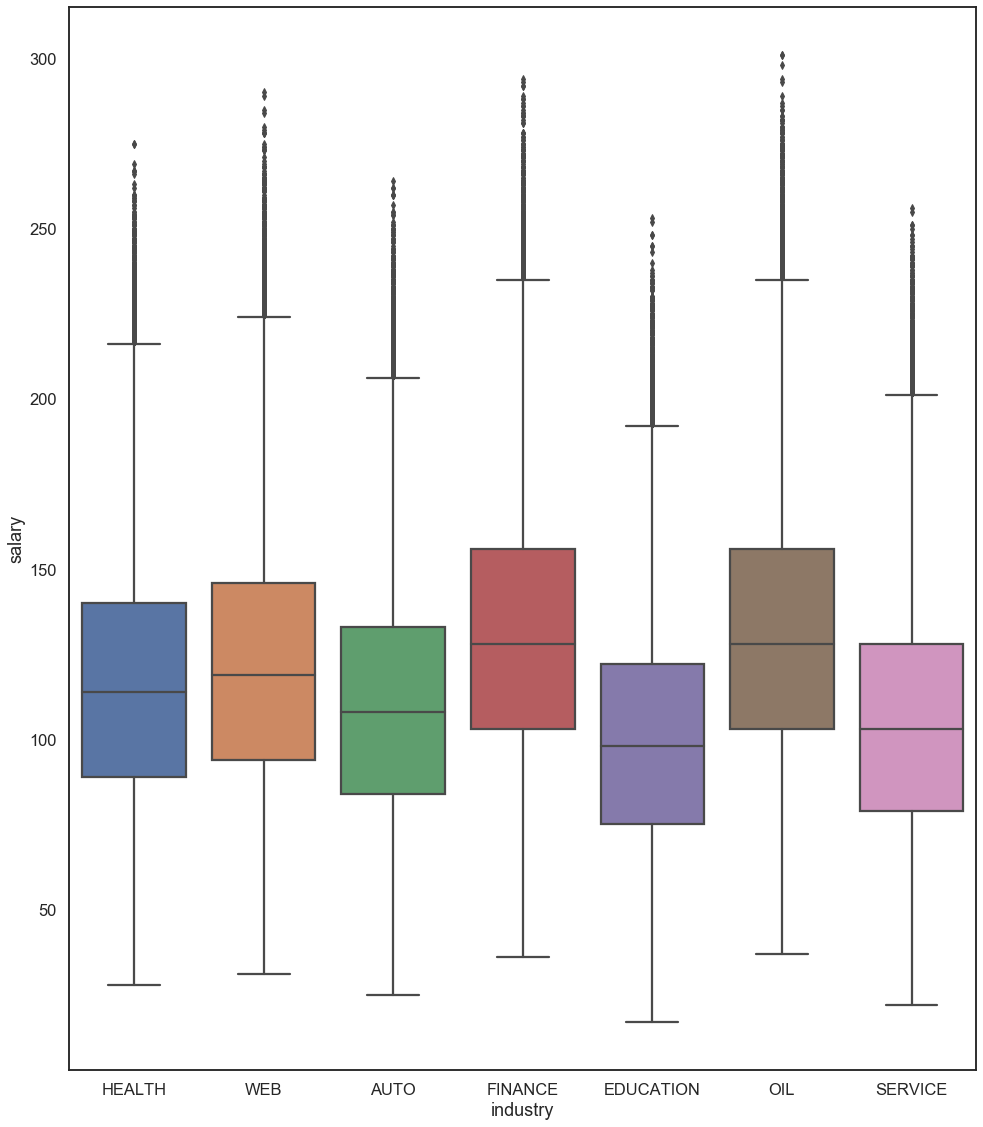

In [28]:
 boxplot(cat_cols, target, train_data)   

In [29]:
crosscorrelation(num_cols,target, train_data)

[{'yearsExperience': 0.3750134019997194},
 {'milesFromMetropolis': -0.29768642704964554}]

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [32]:
num_cols= train_data[['yearsExperience','milesFromMetropolis']]
cat_cols= train_data[['jobType']]
target= train_data['salary']

In [33]:
cat_cols=pd.get_dummies(cat_cols)

In [34]:
dependent_feature= cat_cols.merge(num_cols, left_index=True, right_index=True)

Merged_Data= dependent_feature.merge(target,left_index=True, right_index=True)

Xvar=Merged_Data.drop('salary',axis=1)
Yvar=Merged_Data[['salary']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xvar, Yvar, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(Xvar, Yvar)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Xvar.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,10,83
1,1,0,0,0,0,0,0,0,3,73
2,0,0,0,0,0,0,0,1,10,38
3,0,0,0,0,0,1,0,0,8,17
4,0,0,0,0,0,0,0,1,8,16


In [55]:
Xvar.iloc[0:1,:]

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,10,83


In [36]:
predictions = lr.predict(X_test)

In [37]:
mean_squared_error(y_test, predictions)

621.5061489363038

In [38]:
import pickle
pickle_out = open("lr.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

In [39]:
import numpy as np

In [44]:
#cat_cols= train_data_new[['jobType','degree','major','industry']]

In [58]:
a=lr.predict([[0,1,0,0,0,0,0,0,10,83]])

In [40]:
Xvar.columns

Index(['jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR',
       'jobType_JUNIOR', 'jobType_MANAGER', 'jobType_SENIOR',
       'jobType_VICE_PRESIDENT', 'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [41]:
Xvar.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,10,83
1,1,0,0,0,0,0,0,0,3,73
2,0,0,0,0,0,0,0,1,10,38
3,0,0,0,0,0,1,0,0,8,17
4,0,0,0,0,0,0,0,1,8,16


In [60]:
Xvar

array([[118.10906219]])

In [64]:
#dataFrame = pd.DataFrame(data, columns = ['col1', 'col2'])
#json = dataFrame.to_json()
#print(json)

In [73]:
#json1=Xvar.to_json()

In [66]:
#print(json)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
#json.head()

In [31]:
#type(json)

In [30]:
#import json

In [29]:
#out_file = open("myfile.json", "w") 
    
#json.dump(json1, out_file) 
    
#out_file.close()